<img src="AV_Logo.png" style="width: 200px;height: 75px"/>

Table of Contents
--------------

* [Art of Feature Engineering](#Art-of-Feature-Engineering)
* [Variable Transformation](#Variable-Transformation)
  * [When should we use Variable Transformation?](#When-should-we-use-Variable-Transformation?)
  * [What are the common methods of Variable Transformation?](#What-are-the-common-methods-of-Variable-Transformation?)
* [What is Feature / Variable Creation & its Benefits?](#What-is-Feature/Variable-Creation-&-its-Benefits?)
* [Feature Selection](#Feature-Selection)

## Art of Feature Engineering

Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.

For example, let’s say you are trying to predict foot fall in a shopping mall based on dates. If you try and use the dates directly, you may not be able to extract meaningful insights from the data. This is because the foot fall is less affected by the day of the month than it is by the day of the week. Now this information about day of week is implicit in your data. You need to bring it out to make your model better.

This exercise of bringing out information from data is known as feature engineering.

### Process of feature engineering ?

You perform feature engineering once you have completed the first 5 steps in data exploration:

* Variable Identification
* Univariate
* Bivariate Analysis
* Missing Values Imputation
* Outliers Treatment

Feature engineering itself can be divided in two steps:

* Variable transformation.
* Variable / Feature creation

These two techniques are vital in data exploration and have a remarkable impact on the power of prediction. Let’s understand each of these steps in more details.


### Variable Transformation

In data modeling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm of x is a transformation. In other words, transformation is a process that changes the distribution of a variable with others.

### When should we use Variable Transformation?

Below are the situations where variable transformation is a requisite:

* **When we want to change the scale of a variable or standardize the values of a variable for better understanding**. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distribution
* **When we can transform complex non-linear relationships into linear relationships**. Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation. Transformation helps us to convert a non-linear relation into linear relation. Scatter plot can be used to find the relationship between two continuous variables. These transformations also improve the prediction. Log transformation is one of the commonly used transformation technique used in these situations.

<img src="image1.png" style="width: 500px;height: 150px">


* Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. Some modeling techniques require normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness. 
  * For right skewed distribution, we take square / cube root or logarithm of variable 
  * For left skewed, we take square / cube or exponential of variables.


<img src="image2.png" style="width: 500px;height: 150px">


* Variable Transformation is also done from an implementation point of view (Human involvement). Let’s understand it more clearly. In one of my project on employee performance, I found that age has direct correlation with performance of the employee i.e. higher the age, better the performance. From an implementation stand point, launching age based progamme might present implementation challenge. However, categorizing the sales agents in three age group buckets of <30 years, 30-45 years and >45  and then formulating three different strategies for each group is a judicious approach. This categorization technique is known as Binning of Variables.



 **What are the common methods of Variable Transformation?**

There are various methods used to transform variables. As discussed, some of them include square root, cube root, logarithmic, binning, reciprocal and many others. Let’s look at these methods in detail by highlighting the pros and cons of these transformation methods.

**Logarithm**: Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values.

In [1]:
% pylab inline

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Note: The dataset is the same as you have downloaded yesterday. If you don't have the dataset, you can access it [here](https://datahack.analyticsvidhya.com/contest/datahack-hour-bike-sharing/).

In [2]:
train = pd.read_csv('train_ysMSKmQ.csv')
#test = pd.read_csv('test_uLBXQQR.csv')

In [3]:
# for simplicity, let us drop dteday variable
train = train.drop('dteday', axis=1)
#test = test.drop('dteday', axis=1)

#test_instants = test.instant

In [5]:
train.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025810585710>]], dtype=object)

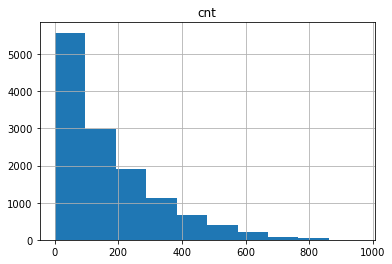

In [6]:
train.hist(column='cnt', )

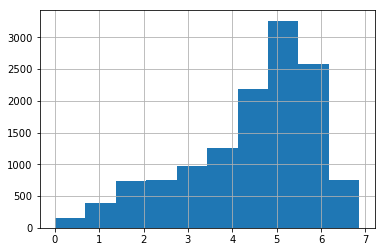

In [7]:
np.log(train.cnt).hist()

As you can see, taking log transform reduces the skewness of data.

*Note: When you do log transform, remember that log(0) is undefined. So before applying log, make sure you dont have any zero values present*

**Square / Cube root**: The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero.

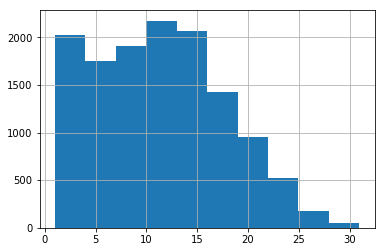

In [7]:
np.sqrt(train.cnt).hist()

We see a better distribution now after taking square root. We should incorporate this in our model. 

Now as "cnt" is our target variable, so before submitting our final predictions we should remember to convert them back to how original variables were. We will do this at the end 

In [8]:
train['cnt'] = np.sqrt(train.cnt)

**Binning**: It is used to categorize variables. It is performed on original values, percentile or frequency. For example, we can categorize income in three categories, namely: High, Average and Low. 

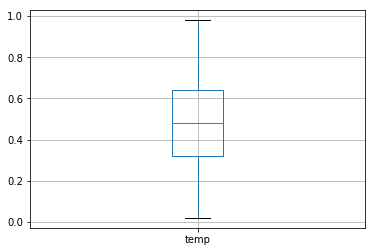

In [9]:
train.boxplot(column='temp')

In [10]:
# depending on boxplot, you divide dataset into three categories
train['temp_bins'] = pd.cut(train.temp, [0, 0.3, 0.7, 1], labels=['Low', 'Average', 'High'])
train['temp_bins']

0            Low
1            Low
2            Low
3            Low
4            Low
5            Low
6            Low
7            Low
8            Low
9        Average
10       Average
11       Average
12       Average
13       Average
14       Average
15       Average
16       Average
17       Average
18       Average
19       Average
20       Average
21       Average
22       Average
23       Average
24       Average
25       Average
26       Average
27       Average
28       Average
29       Average
          ...   
13005       High
13006       High
13007    Average
13008    Average
13009    Average
13010       High
13011       High
13012       High
13013       High
13014       High
13015       High
13016       High
13017       High
13018       High
13019       High
13020       High
13021       High
13022       High
13023       High
13024       High
13025       High
13026       High
13027       High
13028       High
13029       High
13030       High
13031       High
13032       Hi

Similarly we first look at what is the hourly distribution of count and then bin according to it

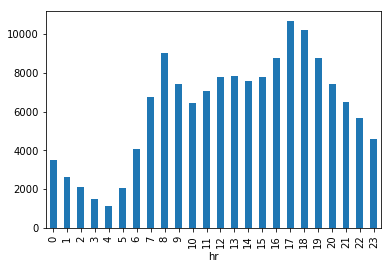

In [11]:
train.groupby('hr')['cnt'].sum().plot.bar()

In [12]:
# depending on barchart, you divide dataset into five categories
train['hr_bins'] = pd.cut(train.hr, [-1, 6, 9, 15, 20, 24], labels=['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night'])
train['hr_bins']

0              Late_Night
1              Late_Night
2              Late_Night
3              Late_Night
4              Late_Night
5              Late_Night
6              Late_Night
7            Office_Going
8            Office_Going
9            Office_Going
10                Mid_Day
11                Mid_Day
12                Mid_Day
13                Mid_Day
14                Mid_Day
15                Mid_Day
16       Office_Returning
17       Office_Returning
18       Office_Returning
19       Office_Returning
20       Office_Returning
21                  Night
22                  Night
23                  Night
24             Late_Night
25             Late_Night
26             Late_Night
27             Late_Night
28             Late_Night
29             Late_Night
               ...       
13005          Late_Night
13006          Late_Night
13007          Late_Night
13008          Late_Night
13009          Late_Night
13010        Office_Going
13011        Office_Going
13012       

We can create bins on the basis of three rationales

* On the basis of Business logic. For example, if company wants to target people according to their age group, they can bin them as stated by requirements
* On the basis of Univariate analysis, as seen above.
* On the basis of Target variable. For example, we can group our predictor variable with repect to the target variable and see the distributions. If there is some pattern, we can bin the feature according to that.

### What is Feature / Variable Creation & its Benefits?

Feature / Variable creation is a process to generate a new variables / features based on existing variable(s). For example, say, we have date(dd-mm-yy) as an input variable in a data set. We can generate new variables like day, month, year, week, weekday that may have better relationship with target variable. This step is used to highlight the hidden relationship in a variable.

There are various techniques to create new features. Let’s look at the some of the commonly used methods:

* **Creating derived variables**: This refers to creating new variables from existing variable(s) using set of functions or different methods. Suppose variable gender has missing values. To predict missing values, we used the salutation (Master, Mr, Miss, Mrs) of name as a new variable. How do we decide which variable to create? Honestly, this depends on business understanding of the analyst, his curiosity and the set of hypothesis he might have about the problem. Methods such as taking log of variables, binning variables and other methods of variable transformation can also be used to create new variables.

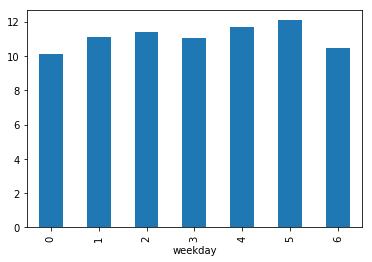

In [13]:
# this code is just grouping the count of rented bikes by weekday and
## plotting it
train.groupby('weekday').median().cnt.plot.bar()

We can see that that renting of bikes is usually more on weekdays and less on weekends. We can take this inference to create variable "weekend". To create this we will use features "workingday" and "holiday". The logic is that when its no working day and it is not a holiday, it would be a weekend

In [14]:
train['weekend'] = ((train.holiday == 0) & (train.workingday == 0)).astype(int)

* **Converting categorical variables to numerical**: Some algorithms have an assumption that the features given to it should be numerical. Otherwise it doesn't consider them for training. This is a problem because not including important features in training might reduce our predictability. We can remedy this issue by label encoding the variables. For example, if the feature "Gender" is "Male" and "Female", we can convert this to 0 and 1, by assigning 0 to "Male" and 1 to "Female"
 

In [15]:
# here we have a categorical column "temp_bins" which we created previously. 
## We label encode this variable
from sklearn.preprocessing import LabelEncoder

In [16]:
# define label encoder
lb_temp = LabelEncoder()

# replace the temp bins column
train['temp_bins'] = lb_temp.fit_transform(train.temp_bins)

In [17]:
# define label encoder
lb_hr = LabelEncoder()

# replace the hr bins column
train['hr_bins'] = lb_hr.fit_transform(train.hr_bins)

*Note: When you label encode the variables, python may considered them to be ordered. This is not always the case. For example, we label encoded low -> 0, avg -> 1 and high -> 2, which makes logical sense. But if the variables are "city A", "city B", "city C", ordering them makes no logical sense. So in this case where categorical variables are unordered, you should prefer creating dummy variables.*

* **Creating dummy variables**: One of the most common application of dummy variable is to convert categorical variable into numerical variables. Dummy variables are also called Indicator Variables. It is useful to take categorical variable as a predictor in statistical models.  Categorical variable can take values 0 and 1. Let’s take a variable ‘gender’. We can produce two variables, namely, “Var_Male” with values 1 (Male) and 0 (No male) and “Var_Female” with values 1 (Female) and 0 (No Female). We can also create dummy variables for more than two classes of a categorical variables with n or n-1 dummy variables.

In [18]:
df = pd.cut(train.atemp, [0, 0.3, 0.7, 1], labels=['atemp_low', 'atemp_avg', 'atemp_high'])
dummy = pd.get_dummies(df)
dummy

,atemp_low,atemp_avg,atemp_high
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,1,0


In [19]:
# append this to our train data
train = pd.concat([train, dummy], axis=1)

### Benefits of variable creation

* Model Improvement - Creating new features sometimes significantly improves the model quality. If the variables we create have a better relationship with the target variables, the model prediction is much better. For example log(Sales) of a product might be linearly dependent on the amount of money spent on advertising rather than the sales itself. So in case we use linear regression model error might be much lower when using log sales instead of using Sales.

* Interpretability - The model is much more readable when we create more descriptive features. The correct choice of features might make much more business sense and help understand the model better. For example converting Dates to weekday and inferring  that the product is sold more on a weekend. So we were able to interpret the date variable by converting it to weekday, and generate better business insights. 



### Feature Selection

People sometimes tend to believe that superior machines make you win competitions. I saw competitions being won using a Mac Book Air, which is not the best computational machine. Over time, I realized that there are 2 things which distinguish winners from others in most of the cases: Feature Creation and Feature Selection. Now that we have seen how to create more features, let's see if feature selection also holds similar importance.

### Importance of Feature Selection

Machine learning works on a simple rule – if you put garbage in, you will only get garbage to come out. By garbage here, I mean noise in data.

This becomes even more important when the number of features are very large. You need not use every feature at your disposal for creating an algorithm. You can assist your algorithm by feeding in only those features that are really important. I have myself witnessed feature subsets giving better results than complete set of feature for the same algorithm. Or as it is said – “Sometimes, less is better!”

Not only in the competitions but this can be very useful in industrial applications as well. You not only reduce the training time and the evaluation time, you also have less things to worry about!

Top reasons to use feature selection are:

* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

Lets look at a few methods of feature selection

### Selecting Uncorrelated features

As we discussed in Day5, it is an assumption of linear regression that correlated features should not be present. Because of adding correlated features, same information goes to our model twice, which makes it more biased. So taking care of uncorrelated features is a must.

In [20]:
train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_bins,hr_bins,weekend,atemp_low,atemp_avg,atemp_high
instant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,NaN,NaN,NaN,0.860652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,NaN,0.860652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.93714,NaN,NaN,NaN
weathersit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that the correlated features are 

* mnth, season
* temp, atemp
* temp_bins, atemp_low, atemp_avg, atemp_high

In [21]:
train = train.drop(['temp'], axis=1)


### Business Sense

This is the most important step when building features for modelling. This is because even if the feature is "mathematically viable", if you can't explain to the client why you chose this feature, then that feature cannot be used. For example, 'ID' column may be an important feature but it does not make business sense to include it as a feature. So we should drop it.

In [22]:
train = train.drop('instant', axis=1)

### Hypothesis testing

Remember that we did hypothesis generation in the beginning. This is also significant when doing feature selection. 

In [23]:
## According to my hypothesis, I selected these features
train = train[['season', 'hr', 'mnth', 'weekend', 'yr', 'weathersit', 'temp_bins', 
               'hum', 'windspeed', 'atemp', 'hr_bins', 'cnt']]

*Note: You can also use [advanced feature selection techniques](http://scikit-learn.org/stable/modules/feature_selection.html). But explaining it is out of scope for this session*

-------------------

Now finally, we will merge all the things we did above and build a linear regression model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# separate predictor and target variables
X = train.drop('cnt', axis=1)
y = train.cnt

In [26]:
# do everything on test

## lets summarize what we did before
## 1. We transformed 'cnt' column
## 2. Binned "temp" to "temp_bins", and 'hr', to 'hr_bins'
## 3. Label encoded "temp_bins" column and 'hr_bins' column 
## 4. Created features atemp_high, atemp_avg, atemp_low and weekday
## 5. Selected features

## We will do step 2 - step 4 now and later we will do step 1

# step 2
test['temp_bins'] = pd.cut(test.temp, [0, 0.3, 0.7, 1], labels=['Low', 'Average', 'High'])
test['hr_bins'] = pd.cut(test.hr, [-1, 6, 9, 15, 20, 24], labels=['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night'])

# step 3
## Note: we have already trained our label encoder, so no need to train again. 
## Therefore we use lb.transform instead of lb.fit_transform function
test['temp_bins'] = lb_temp.transform(test.temp_bins)
test['hr_bins'] = lb_hr.transform(test.hr_bins)

# step 4
df = pd.cut(test.atemp, [0, 0.3, 0.7, 1], labels=['atemp_low', 'atemp_avg', 'atemp_high'])
dummy = pd.get_dummies(df)
test = pd.concat([test, dummy], axis=1)

test['weekend'] = ((test.holiday == 0) & (test.workingday == 0)).astype(int)

# step 5
test = test[['season', 'hr', 'mnth', 'weekend', 'yr', 'weathersit', 'temp_bins', 
               'hum', 'windspeed', 'atemp', 'hr_bins']]

X_test = test#.drop([ 'temp_bins'], axis=1)

In [27]:
print(X.columns, '\n', X_test.columns)

Index(['season', 'hr', 'mnth', 'weekend', 'yr', 'weathersit', 'temp_bins',
       'hum', 'windspeed', 'atemp', 'hr_bins'],
      dtype='object') 
 Index(['season', 'hr', 'mnth', 'weekend', 'yr', 'weathersit', 'temp_bins',
       'hum', 'windspeed', 'atemp', 'hr_bins'],
      dtype='object')


In [28]:
# define linear regression model
lin = LinearRegression()

In [29]:
lin.fit(X, y)
predictions = lin.predict(X_test)

In [30]:
predictions = np.square(predictions)

In [31]:
# create submission file
submission = pd.DataFrame(data=[], columns=['instant', 'cnt'])
submission.instant = test_instants; submission.cnt = predictions

submission.to_csv('submission.csv', index=False)

submission.head()

,instant,cnt
0,13036,384.027600
1,13037,401.867470
2,13038,266.831538
3,13039,300.424622
4,13040,292.321082


Now that you have got a basic understanding of how to solve a problem, let's test your knowledge in a live environment! This will be your exercise for today.

Participate in the practice problem [Big Mart Sales](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

Here are some guidelines/tips which can help you in the endeavor:

* **Step 1**: To participate in the practice problem, register for the competition and download the dataset.
* **Step 2**: Understand the problem statement and generate hypothesis for it. You can discuss your hypothesis in the slack channel
* **Step 3**: Do a preliminary exploration of the dataset. Refer Day 3 to refresh your memory.
* **Step 4**: Treat Missing values and Outliers from the dataset.
* **Step 5**: Use the feature engineering steps you learnt today to create and transform variables. 
* **Step 6**: Perform feature selection. Also think of the business logic when selecting features.
* **Step 7**: Build a linear regression model and submit it on the  practice problem. Share your score on slack channel!

If you face any difficulty, ask your query in the slack channel. Good Luck!

That's all for today!
----------------
-------------------------------
<img src="AV_Datafest_logo.png" style="width: 200px;height: 200px"/>
[www.analyticsvidhya.com](www.analyticsvidhya.com)

DATAFEST 2017